# Comprensión de los Datos

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("diabetes.csv")

# ------------------------------
# 1) Matriz de correlación
# ------------------------------
variables_numericas = df.select_dtypes(include='number')

# Calcular matriz de correlación
matriz_correlacion = variables_numericas.corr().round(2)

print("=== Matriz de Correlación ===")
print(matriz_correlacion)

"""En la matriz podemos observar las relaciones numéricas entre todas las variables:

Pregnancies tiene una correlación moderada con Age (0.54), lo que indica que a mayor edad suelen aumentar los embarazos, y una relación ligera con el diagnóstico (0.22).

Glucose es la variable que más se asocia con Outcome (0.47), mostrando que el nivel de glucosa es un factor clave en la diabetes.

BloodPressure apenas se relaciona con otras variables, sus correlaciones son bajas, por lo que no aporta mucha explicación en este caso.

SkinThickness se relaciona con Insulin (0.44) y BMI (0.39), lo cual tiene sentido porque estas tres variables están ligadas al tejido adiposo.

Insulin también tiene relación con SkinThickness y BMI, pero con Outcome apenas llega a 0.13.

BMI muestra correlación positiva con el diagnóstico (0.29) y con SkinThickness (0.39), lo que indica que el peso corporal es un factor a considerar.

DiabetesPedigreeFunction no se relaciona fuerte con otras variables, pero aporta un riesgo moderado de diabetes (0.17 con Outcome).

Age aumenta con los embarazos y se conecta de manera ligera con la diabetes (0.24)."""




=== Matriz de Correlación ===
                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14          -0.08   
Glucose                          0.13     1.00           0.15           0.06   
BloodPressure                    0.14     0.15           1.00           0.21   
SkinThickness                   -0.08     0.06           0.21           1.00   
Insulin                         -0.07     0.33           0.09           0.44   
BMI                              0.02     0.22           0.28           0.39   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.18   
Age                              0.54     0.26           0.24          -0.11   
Outcome                          0.22     0.47           0.07           0.07   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                 -0.07  0.02                     -0.03  0.54   
Glucose            

'En la matriz podemos observar las relaciones numéricas entre todas las variables:\n\nPregnancies tiene una correlación moderada con Age (0.54), lo que indica que a mayor edad suelen aumentar los embarazos, y una relación ligera con el diagnóstico (0.22).\n\nGlucose es la variable que más se asocia con Outcome (0.47), mostrando que el nivel de glucosa es un factor clave en la diabetes.\n\nBloodPressure apenas se relaciona con otras variables, sus correlaciones son bajas, por lo que no aporta mucha explicación en este caso.\n\nSkinThickness se relaciona con Insulin (0.44) y BMI (0.39), lo cual tiene sentido porque estas tres variables están ligadas al tejido adiposo.\n\nInsulin también tiene relación con SkinThickness y BMI, pero con Outcome apenas llega a 0.13.\n\nBMI muestra correlación positiva con el diagnóstico (0.29) y con SkinThickness (0.39), lo que indica que el peso corporal es un factor a considerar.\n\nDiabetesPedigreeFunction no se relaciona fuerte con otras variables, pero

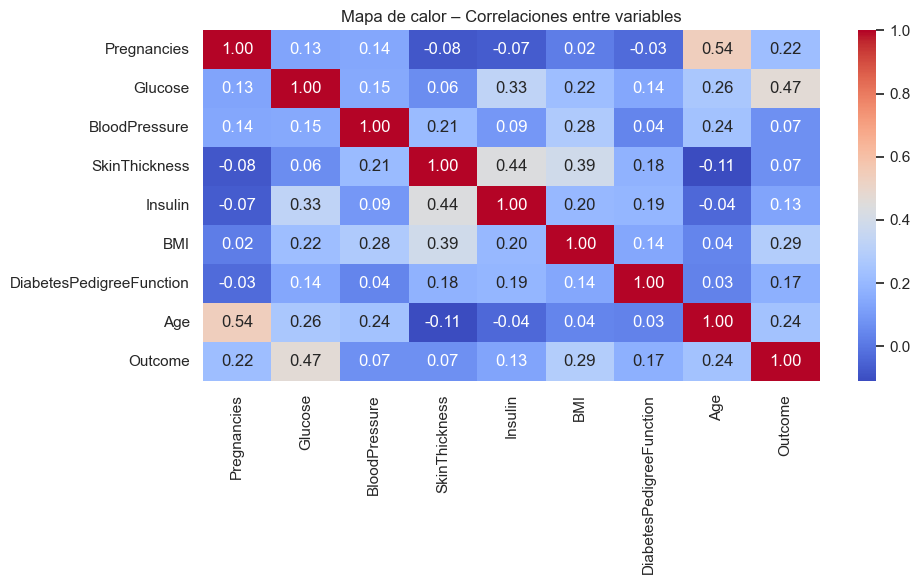

' El mapa de calor permite ver de manera visual cómo se relacionan las variables entre sí. Los tonos rojos muestran correlaciones positivas más fuertes y los tonos azules indican relaciones débiles o negativas. Se observa que Glucose es la variable más relacionada con el diagnóstico de diabetes, con una correlación positiva media, lo que confirma que a mayor nivel de glucosa hay mayor probabilidad de diabetes. También se aprecia que BMI tiene una relación positiva con el resultado, aunque más moderada. Entre las variables independientes destacan las asociaciones entre SkinThickness, Insulin y BMI, que muestran un vínculo moderado y lógico porque todas están relacionadas con la grasa corporal. Por otro lado, variables como BloodPressure tienen correlaciones muy bajas con casi todas las demás, lo que indica que aportan poca información. Finalmente, se aprecia que Pregnancies está bastante ligada con la Edad, lo que es natural ya que las mujeres mayores tienden a tener un historial más al

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor – Correlaciones entre variables")
plt.tight_layout()
plt.show()

""" El mapa de calor permite ver de manera visual cómo se relacionan las variables entre sí. Los tonos rojos muestran correlaciones positivas más fuertes y los tonos azules indican relaciones débiles o negativas. Se observa que Glucose es la variable más relacionada con el diagnóstico de diabetes, con una correlación positiva media, lo que confirma que a mayor nivel de glucosa hay mayor probabilidad de diabetes. También se aprecia que BMI tiene una relación positiva con el resultado, aunque más moderada. Entre las variables independientes destacan las asociaciones entre SkinThickness, Insulin y BMI, que muestran un vínculo moderado y lógico porque todas están relacionadas con la grasa corporal. Por otro lado, variables como BloodPressure tienen correlaciones muy bajas con casi todas las demás, lo que indica que aportan poca información. Finalmente, se aprecia que Pregnancies está bastante ligada con la Edad, lo que es natural ya que las mujeres mayores tienden a tener un historial más alto de embarazos"""

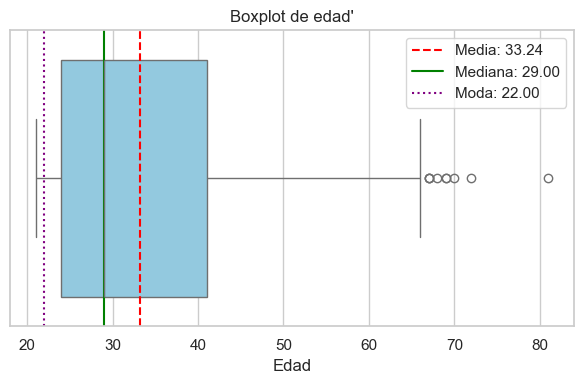

'El boxplot de la variable Age muestra cómo se distribuyen las edades dentro del conjunto de datos. La mediana se encuentra alrededor de los 29 años, lo que indica que la mitad de las personas tienen menos de esa edad y la otra mitad más. La media está un poco más arriba, cerca de los 33 años, lo que refleja una ligera inclinación hacia edades mayores. La moda se ubica en 22 años, siendo el valor de edad que más se repite. También se observan algunos valores más altos que sobresalen como posibles atípicos, lo que indica que hay personas con edades mucho mayores que la mayoría del grupo. En conjunto, este gráfico confirma que la población es mayormente joven-adulta, con unos pocos casos en edades avanzadas.'

In [13]:
# 2) Boxplot de Age
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"], color="skyblue")

# Calcular medidas de tendencia central
mean_age = df["Age"].mean()
median_age = df["Age"].median()
mode_age = df["Age"].mode()[0]

# Agregar líneas de media, mediana y moda
plt.axvline(mean_age, color="red", linestyle="--", label=f"Media: {mean_age:.2f}")
plt.axvline(median_age, color="green", linestyle="-", label=f"Mediana: {median_age:.2f}")
plt.axvline(mode_age, color="purple", linestyle=":", label=f"Moda: {mode_age:.2f}")

plt.title("Boxplot de edad'")
plt.xlabel("Edad")
plt.legend()
plt.tight_layout()
plt.show()

"""El boxplot de la variable Age muestra cómo se distribuyen las edades dentro del conjunto de datos. La mediana se encuentra alrededor de los 29 años, lo que indica que la mitad de las personas tienen menos de esa edad y la otra mitad más. La media está un poco más arriba, cerca de los 33 años, lo que refleja una ligera inclinación hacia edades mayores. La moda se ubica en 22 años, siendo el valor de edad que más se repite. También se observan algunos valores más altos que sobresalen como posibles atípicos, lo que indica que hay personas con edades mucho mayores que la mayoría del grupo. En conjunto, este gráfico confirma que la población es mayormente joven-adulta, con unos pocos casos en edades avanzadas."""

# Descripción de Variables


Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd): Categórica Nominal 
survival Survival (0 = No; 1 = Yes)  
name Name  
sex Sex  
age Age  
sibsp Number of Siblings/Spouses Aboard  
parch Number of Parents/Children Aboard  
ticket Ticket Number  
fare Passenger Fare (British pound)  
cabin Cabin  
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  
boat Lifeboat  
body Body Identification Number  
home.dest Home/Destination

**Ejemplo:** Crear un objeto DataFrame con base en un archivo .csv

In [ ]:
#lee archivo csv


In [ ]:
#Usa función shape para revisar el total de renglones y columnas


In [1]:
#Revisa los primeros 5 renglones del dataset usando la función head()


In [3]:
#Revisa los últimos 5 renglones del dataset usando la función tail()

In [4]:
#Revisa la información mas completa del conjunto de datos usando la función info()
#Muestra el total de datos, las columnas y su tipo correspondiente, dice si contiene nulos o no


In [5]:
#revisa cuántos valores únicos tiene cada atributo del archivo usando la función nunique()


## Exploración de Datos

In [6]:
#utiliza la función describe() para obtener estadística básica. se puede incluir -0


In [7]:
#Revisa Valores nulos con funcion isnull().sum()


In [ ]:
#Revisar valores únicos por columna usando función unique(): nombre-columna.unique()


## Variables Cuantitativas

### Medidas de tendencia central


In [ ]:
#Edad
#Se puede obtener la media, mediana y moda para
mean_age = titanic['Age'].mean()
median_age =titanic['Age'].median()
mode_age = titanic['Age'].mode()
print("Mean_age:",mean_age)
print("Median_age:",median_age)
print("Mode_age:",mode_age)

Mean_age: 29.69911764705882
Median_age: 28.0
Mode_age: 0    24.0
dtype: float64


Conclusiones:
La edad promedio fue 29
La edad al centro es 28
La edad más repetida fue de 24

# Variables Categóricas

In [9]:
#Para conteo  de cada valor en una columna, en orden descendente usar función value_counts():    
# nombreDataframe.columna.value_counts()
# nombreDataframe['columna'].value_counts()


In [10]:
#Revisa conteo de varias columnas

In [13]:
# Crear variable familySize que incluya la suma de las columnas SibSp y Parch
# Mostrar el total por cada tamaño de familia


## Consulta

In [15]:
# df.iloc[i]: Accede a la fila en la posición i.
# Acceder a la primera fila


In [ ]:
# Acceder a las dos primeras filas


In [16]:
#Seleccionar columnas, indicando entre corchetes [nombreColumna, nombreColumna]


In [ ]:
#Selección de filas [indicar dataframe[columna] operador valor]


In [18]:
#ordenar usando funcion sort_values(by=atributo, ascending=True/false)


In [ ]:
#Agrupar por un atributo y calcular función de agregación utilizando groupby(atributo)['atributoAgregacion].funcion() (ej. mean() para promedio)


Crea un subconjunto de **titanic** para el costo mayor a 500

In [19]:
# usa el criterio para extraer solo los boletos caros con fare > 50
